In [ ]:
import numpy as np
import random
np.random.seed(1337)
random.seed(1337)

In [ ]:
# Plotting support
from matplotlib import pyplot as plt
from plotnine import *
# Standard libraries
import pandas as pd
import sklearn as sk
import numpy as np

##  Bad data

In [ ]:


count = 0
li_col=[]
#read csv as string(easy to find matches)
data = pd.read_csv('combined_data.csv', dtype='str')
#iterate through each cell
for column in data:
    for i in data[column]:
      #find data with bound method Series.mean
      if 'bound method Series.mean' in i:
        count+=1
        #get a list of index and corresponding columns
        list_index = data[data[column]==i].index.values
        li_col.append(column)

print('Number of cells with bound method Series.mean: ',count)

#update cells with 0
for i, j in zip(list_index, li_col):
  data.at[i,j] = 0

#update elections_clean.csv
data.to_csv('elections_clean.csv')

Number of cells with bound method Series.mean:  5


## split

In [ ]:


#find 4 digits fips code
for i in data['fips']:
  if len(i) == 4:
    #add 0 in front of 4 digit fips code
    index = data[data['fips']==i].index.values
    correct_num = '0'+i
    data.at[index[0],'fips'] = correct_num

#split fips into State and County
data['State'] = data['fips'].str[0:2]
data['County'] = data['fips'].str[2:]

#drop fips
data.drop('fips',axis=1, inplace=True)

#reorder columns
col = data.columns.tolist()
col = col[-1:] + col[:-1]
col = col[-1:] + col[:-1]
#write to elections_clean.csv
data.reindex(columns=col).to_csv('elections_clean.csv')
#sample output
data=data.reindex(columns=col)
data

,State,County,votes,"Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015",Unemployment_rate_2015,POP_ESTIMATE_2015,Amish,Buddhist,Catholic,Christian Generic,Eastern Orthodox,Hindu,Jewish,Mainline Christian,Mormon,Muslim,Non-Catholic Christian,Other,Other Christian,Other Misc,Pentecostal / Charismatic,Protestant Denomination,Zoroastrian,MedHHInc2014,PerCapitaInc,PovertyUnder18Pct2014,PovertyAllAgesPct2014,Deep_Pov_All,Deep_Pov_Children,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,age_total_pop,0-4_rate,5-9_rate,10-14_rate,15-19_rate,20-24_rate,25-29_rate,30-34_rate,35-39_rate,40-44_rate,45-49_rate,50-54_rate,55-59_rate,60-64_rate,65-69_rate,70-74_rate,75-79_rate,80-84_rate,85+_rate,TOT_MALE_rate,TOT_FEMALE_rate,WHITE_MALE_rate,WHITE_FEMALE_rate,BLACK_MALE_rate,BLACK_FEMALE_rate,NATIVE_AMERICAN_MALE_rate,NATIVE_AMERICAN_FEMALE_rate,ASIAN_MALE_rate,ASIAN_FEMALE_rate,HAWAIIAN_PACIFIC_MALE_rate,HAWAIIAN_PACIFIC_FEMALE_rate,MULTI_MALE_rate,MULTI_FEMALE_rate,WHITE_rate,BLACK_rate,NATIVE_AMERICAN_rate,HAWAIIAN_PACIFIC_rate,MULTI_rate,voter_turnout_rate,Democrat
0,02,013,7471,18.3,39.4,28.2,14,3.2,3341,0,0,190,42,0,0,0,0,0,0,42,2,0,193,0,0,0,55462,27122,15.6,16.2,4.933008526,2.459016393,3141,747,15009.86,8027.92,6981.94,0.4,0.1,1143123.501,0.060750213,0.062571678,0.062571678,0.06447675,0.069363595,0.068451447,0.066075281,0.062176082,0.061737083,0.063702225,0.068223293,0.066614497,0.058251893,0,0.035105629,0.024843318,0.017737832,0.019228004,0.483099789,0.49832627,0.375296042,0.382213676,0.062078711,0.067585903,0.006031419,0.00592211,0.026151723,0,0.001168006,0.001130534,0.012373888,0,0.757509718,0.129664614,0.011953529,0.00229854,0.012373888,2.236156839,0
1,02,016,7471,16,37,32.2,14.7,3.8,5702,0,0,202,56,0,0,0,14,19,0,0,20,0,177,1,0,0,68387,32700,9.7,9.9,4.287817446,4.505494505,5561,1929,14116.44,9726.16,4390.28,1.3,0.4,1143123.501,0.060750213,0.062571678,0.062571678,0.06447675,0.069363595,0.068451447,0.066075281,0.062176082,0.061737083,0.063702225,0.068223293,0.066614497,0.058251893,0,0.035105629,0.024843318,0.017737832,0.019228004,0.483099789,0.49832627,0.375296042,0.382213676,0.062078711,0.067585903,0.006031419,0.00592211,0.026151723,0,0.001168006,0.001130534,0.012373888,0,0.757509718,0.129664614,0.011953529,0.00229854,0.012373888,1.31024202,0
2,02,020,7471,7,24.1,35.6,33.2,5,298695,0,13,165,200,0,0,1,47,47,3,38,69,16,68,22,6,0,75200,36508,14.2,10,3.903225031,4.874348923,291826,113032,1961,256.32,1704.68,171.2,66.3,1143123.501,0.060750213,0.062571678,0.062571678,0.06447675,0.069363595,0.068451447,0.066075281,0.062176082,0.061737083,0.063702225,0.068223293,0.066614497,0.058251893,0,0.035105629,0.024843318,0.017737832,0.019228004,0.483099789,0.49832627,0.375296042,0.382213676,0.062078711,0.067585903,0.006031419,0.00592211,0.026151723,0,0.001168006,0.001130534,0.012373888,0,0.757509718,0.129664614,0.011953529,0.00229854,0.012373888,0.025012136,0
3,02,050,7471,21,43.6,23.7,11.6,14.4,17946,0,0,549,167,0,0,0,2,10,0,0,11,0,306,11,1,0,45808,18875,31.7,23.8,8.64484623,10.32977692,17013,5919,45504.21,4934.2,40570,0.4,0.1,1143123.501,0.060750213,0.062571678,0.062571678,0.06447675,0.069363595,0.068451447,0.066075281,0.062176082,0.061737083,0.063702225,0.068223293,0.066614497,0.058251893,0,0.035105629,0.024843318,0.017737832,0.019228004,0.483099789,0.49832627,0.375296042,0.382213676,0.062078711,0.067585903,0.006031419,0.00592211,0.026151723,0,0.001168006,0.001130534,0.012373888,0,0.757509718,0.129664614,0.011953529,0.00229854,0.012373888,0.416304469,0
4,02,060,7471,8,30.7,41.3,20,9.2,892,0,0,347,6,0,0,0,0,0,0,6,1,0,227,0,0,0,75364,37012,12.2,9.5,4.8

## Aggregate

In [ ]:


#read csv file 
data = pd.read_csv('elections_clean.csv')


#retrieve all education colmuns
education = data[data.columns[4:8]]
education = education.idxmax(axis=1)
#create a new column
li_education = []

#find mathces than append to new colmun
for i in education:

  if 'Percent of adults with less than a high school diploma' in i:
    li_education.append('less than high school')
  
  if 'Percent of adults with a high school diploma only' in i:
    li_education.append('some high school')

  if 'Percent of adults completing some college or associate' in i:
    li_education.append('some college')

  if 'Percent of adults with a bachelor' in i:
    li_education.append('bachelor or higher')

#use insert() to insert column, and drop redundent columns
data.insert(4, 'Education', li_education)
data.drop('Percent of adults with less than a high school diploma, 2011-2015',axis=1, inplace=True)
data.drop('Percent of adults with a high school diploma only, 2011-2015', axis=1, inplace=True)
data.drop("Percent of adults completing some college or associate's degree, 2011-2015", axis=1, inplace=True)
data.drop("Percent of adults with a bachelor's degree or higher, 2011-2015", axis=1, inplace=True)
data.drop("Unnamed: 0", axis=1, inplace=True)


#religion applies the same logic as education
religion = data[data.columns[6:23]]
col_religion = religion.columns
religion = religion.idxmax(axis=1)

li_religion = []

#find mathces than append to new colmun
#this is a more optimized way to find mathces compared to education
#retrieve list of religion names and matches with list of religion results
for i in religion:
  for j in col_religion:
    if i == j:
      li_religion.append(j)

data.insert(6,'Religion', li_religion)

for i in col_religion:
  data.drop(i,axis=1,inplace=True)

#aggregate age
age = data[data.columns[21:39]]
col_age = age.columns  
Young = data["0-4_rate"]+data["5-9_rate"]+data["10-14_rate"]+data["15-19_rate"]
Adult = data["20-24_rate"]+data["25-29_rate"]+data["30-34_rate"]+data["35-39_rate"]+data["40-44_rate"]+data["45-49_rate"]+data["50-54_rate"]+data["55-59_rate"]+data["60-64_rate"]
Old = data["65-69_rate"]+data["70-74_rate"]+data["75-79_rate"]+data["80-84_rate"]+data["85+_rate"]

data.insert(21,'Young', Young)
data.insert(22,'Adult', Adult)
data.insert(23,'Old', Old)

for i in col_age:
  data.drop(i,axis=1,inplace=True)

#ethnic and gender
ethnic = data[data.columns[26:43]]
col_ethnic = ethnic.columns

col_ethnic_male = []
col_ethnic_female = []

#retrieve male and female
for i in col_ethnic:

  if 'FEMALE' in i:
    col_ethnic_female.append(i)
  else:
    if 'MALE' in i:
      col_ethnic_male.append(i)

#find max val index of male and femal
ethnic_male = ethnic[col_ethnic_male]
ethnic_male = ethnic_male.idxmax(axis=1)

ethnic_female = ethnic[col_ethnic_female]
ethnic_female = ethnic_female.idxmax(axis=1)

li_ethnic_male = []
li_ethnic_female = []

#find mathces than append to new colmun
for i in ethnic_male:
  for j in col_ethnic_male:
    if i == j:
      j=j.replace('_rate', '')
      li_ethnic_male.append(j)

for i in ethnic_female:
  for j in col_ethnic_female:
    if i == j:
      j=j.replace('_rate', '')
      li_ethnic_female.append(j)

data.insert(26,'EthnicMale', li_ethnic_male)
data.insert(27,'EthnicFemale', li_ethnic_female)

for i in col_ethnic:
  data.drop(i,axis=1,inplace=True)

#Remove PovertyUnder18Pct2014, Deep Pov Children...
data.drop('PovertyUnder18Pct2014',axis=1,inplace=True)
data.drop('Deep_Pov_Children',axis=1,inplace=True)
data.drop('Housing units',axis=1,inplace=True)
data.drop('Area in square miles - Water area', axis=1,inplace=True)
data.drop('Area in square miles - Land area', axis=1,inplace=True)
data.drop('Density per square mile of land area - Housing units',axis=1,inplace=True)
data.drop('age_total_pop', axis=1,inplace=True)

#write to election_clean
data.to_csv('elections_clean.csv')
#sample output
data


,State,County,votes,Education,Unemployment_rate_2015,POP_ESTIMATE_2015,Religion,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,Area in square miles - Total area,Density per square mile of land area - Population,Young,Adult,Old,TOT_MALE_rate,TOT_FEMALE_rate,EthnicMale,EthnicFemale,voter_turnout_rate,Democrat
0,2,13,7471,some high school,3.2,3341.0,Other Misc,55462.0,27122.0,16.2,4.933009,3141,15009.86,0.4,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,2.236157,0
1,2,16,7471,some high school,3.8,5702.0,Catholic,68387.0,32700.0,9.9,4.287817,5561,14116.44,1.3,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,1.310242,0
2,2,20,7471,some college,5.0,298695.0,Christian Generic,75200.0,36508.0,10.0,3.903225,291826,1961.00,171.2,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.025012,0
3,2,50,7471,some high school,14.4,17946.0,Catholic,45808.0,18875.0,23.8,8.644846,17013,45504.21,0.4,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.416304,0
4,2,60,7471,some college,9.2,892.0,Catholic,75364.0,37012.0,9.5,4.868154,997,887.56,2.0,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,8.375561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,56,37,16661,some college,4.6,44626.0,Catholic,72604.0,30500.0,9.8,5.959690,43806,10491.09,4.2,0.300968,0.607045,0.060077,0.518554,0.481446,WHITE_MALE,WHITE_FEMALE,0.373347,0
3141,56,39,12176,bachelor or higher,3.8,23125.0,Catholic,75348.0,43628.0,7.7,3.176056,21294,4216.33,5.3,0.212065,0.668584,0.076151,0.516324,0.483676,WHITE_MALE,WHITE_FEMALE,0.526530,1
3142,56,41,8053,some high school,4.9,20822.0,Mormon,56800.0,25778.0,10.0,6.860387,21118,2087.57,10.1,0.320094,0.565364,0.071367,0.502978,0.497022,WHITE_MALE,WHITE_FEMALE,0.386754,0
3143,56,43,3715,some college,4.0,8328.0,Christian Generic,50802.0,26922.0,12.6,5.578363,8533,2242.70,3.8,0.252882,0.538785,0.141811,0.509246,0.490754,WHITE_MALE,WHITE_FEMALE,0.446085,0


## Rename

In [ ]:
#rename
data.rename(columns={'Area in square miles - Total area':'TotalArea',
                     'Density per square mile of land area - Population':'PopDensity'},
            inplace=True)
#write to election_clean
data.to_csv('elections_clean.csv')
#sample output
data

,State,County,votes,Education,Unemployment_rate_2015,POP_ESTIMATE_2015,Religion,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,TotalArea,PopDensity,Young,Adult,Old,TOT_MALE_rate,TOT_FEMALE_rate,EthnicMale,EthnicFemale,voter_turnout_rate,Democrat
0,2,13,7471,some high school,3.2,3341.0,Other Misc,55462.0,27122.0,16.2,4.933009,3141,15009.86,0.4,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,2.236157,0
1,2,16,7471,some high school,3.8,5702.0,Catholic,68387.0,32700.0,9.9,4.287817,5561,14116.44,1.3,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,1.310242,0
2,2,20,7471,some college,5.0,298695.0,Christian Generic,75200.0,36508.0,10.0,3.903225,291826,1961.00,171.2,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.025012,0
3,2,50,7471,some high school,14.4,17946.0,Catholic,45808.0,18875.0,23.8,8.644846,17013,45504.21,0.4,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.416304,0
4,2,60,7471,some college,9.2,892.0,Catholic,75364.0,37012.0,9.5,4.868154,997,887.56,2.0,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,8.375561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,56,37,16661,some college,4.6,44626.0,Catholic,72604.0,30500.0,9.8,5.959690,43806,10491.09,4.2,0.300968,0.607045,0.060077,0.518554,0.481446,WHITE_MALE,WHITE_FEMALE,0.373347,0
3141,56,39,12176,bachelor or higher,3.8,23125.0,Catholic,75348.0,43628.0,7.7,3.176056,21294,4216.33,5.3,0.212065,0.668584,0.076151,0.516324,0.483676,WHITE_MALE,WHITE_FEMALE,0.526530,1
3142,56,41,8053,some high school,4.9,20822.0,Mormon,56800.0,25778.0,10.0,6.860387,21118,2087.57,10.1,0.320094,0.565364,0.071367,0.502978,0.497022,WHITE_MALE,WHITE_FEMALE,0.386754,0
3143,56,43,3715,some college,4.0,8328.0,Christian Generic,50802.0,26922.0,12.6,5.578363,8533,2242.70,3.8,0.252882,0.538785,0.141811,0.509246,0.490754,WHITE_MALE,WHITE_FEMALE,0.446085,0


## Normalize

In [ ]:
#nomalize income related features
data['MedHHInc2014'] = (data['MedHHInc2014'] - data['MedHHInc2014'].mean())/data['MedHHInc2014'].std()
data['PerCapitaInc'] = (data['PerCapitaInc'] - data['PerCapitaInc'].mean())/data['PerCapitaInc'].std()
data['POP_ESTIMATE_2015'] = (data['POP_ESTIMATE_2015'] - data['POP_ESTIMATE_2015'].mean())/data['POP_ESTIMATE_2015'].std()
data['Population'] = (data['Population'] - data['Population'].mean())/data['Population'].std()
data['PopDensity'] = (data['PopDensity'] - data['PopDensity'].mean())/data['PopDensity'].std()
data['TotalArea'] = (data['TotalArea'] - data['TotalArea'].mean())/data['TotalArea'].std()

#divided 100 to rate feature
data['Unemployment_rate_2015'] = data['Unemployment_rate_2015']/100
data['PovertyAllAgesPct2014'] = data['PovertyAllAgesPct2014']/100
data['Deep_Pov_All'] = data['Deep_Pov_All']/100
data['voter_turnout_rate'] = data['voter_turnout_rate']/100

#write to election_clean
data.to_csv('elections_clean.csv')
#sample output
data

,State,County,votes,Education,Unemployment_rate_2015,POP_ESTIMATE_2015,Religion,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,TotalArea,PopDensity,Young,Adult,Old,TOT_MALE_rate,TOT_FEMALE_rate,EthnicMale,EthnicFemale,voter_turnout_rate,Democrat
0,2,13,7471,some high school,0.032,-0.302941,Other Misc,0.687560,0.536546,0.162,0.049330,-0.303769,3.607031,-0.151741,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.022362,0
1,2,16,7471,some high school,0.038,-0.295813,Catholic,1.756005,1.514791,0.099,0.042878,-0.296033,3.373533,-0.151220,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.013102,0
2,2,20,7471,some college,0.050,0.588811,Christian Generic,2.319201,2.182621,0.100,0.039032,0.619098,0.196677,-0.052732,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.000250,0
3,2,50,7471,some high school,0.144,-0.258845,Catholic,-0.110488,-0.909776,0.238,0.086448,-0.259423,11.576810,-0.151741,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.004163,0
4,2,60,7471,some college,0.092,-0.310336,Catholic,2.332758,2.271011,0.095,0.048682,-0.310623,-0.083870,-0.150814,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.083756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,56,37,16661,some college,0.046,-0.178291,Catholic,2.104603,1.128965,0.098,0.059597,-0.173771,2.426038,-0.149539,0.300968,0.607045,0.060077,0.518554,0.481446,WHITE_MALE,WHITE_FEMALE,0.003733,0
3141,56,39,12176,bachelor or higher,0.038,-0.243208,Catholic,2.331436,3.431296,0.077,0.031761,-0.245737,0.786113,-0.148901,0.212065,0.668584,0.076151,0.516324,0.483676,WHITE_MALE,WHITE_FEMALE,0.005265,1
3142,56,41,8053,some high school,0.049,-0.250162,Mormon,0.798166,0.300842,0.100,0.068604,-0.246300,0.229756,-0.146119,0.320094,0.565364,0.071367,0.502978,0.497022,WHITE_MALE,WHITE_FEMALE,0.003868,0
3143,56,43,3715,some college,0.040,-0.287884,Christian Generic,0.302341,0.501471,0.126,0.055784,-0.286532,0.270300,-0.149771,0.252882,0.538785,0.141811,0.509246,0.490754,WHITE_MALE,WHITE_FEMALE,0.004461,0


## Summary

In [ ]:
#pop estimate 2015 mean
summary = []
summary.append(data['POP_ESTIMATE_2015'].mean())
#add columns with different length
data.loc[:,'mean_POP_ESTIMATE_2015'] = pd.Series(summary)

#pop estimate 2015 std
summary.clear()
summary.append(data['POP_ESTIMATE_2015'].std())
#add columns with different length
data.loc[:,'std_POP_ESTIMATE_2015'] = pd.Series(summary)

#Population mean
summary.clear()
summary.append(data['Population'].mean())
#add columns with different length
data.loc[:,'mean_Population'] = pd.Series(summary)

#Population std
summary.clear()
summary.append(data['Population'].std())
#add columns with different length
data.loc[:,'std_Population'] = pd.Series(summary)

#correlation score
summary.clear()
cor = data['POP_ESTIMATE_2015'].corr(data['Population'])
summary.append(cor)
data.loc[:,'correlation_Population'] = pd.Series(summary)
if cor > 0.9:
  print('POP_ESTIMATE_2015 and Population are correlated')
  data.drop('POP_ESTIMATE_2015', axis=1,inplace=True)

#PerCapitaInc median
summary.clear()
summary.append(data['PerCapitaInc'].median())
#add columns with different length
data.loc[:,'median_PerCapitaInc'] = pd.Series(summary)

#PerCapitaInc quartile
summary.clear()
summary.append(data['PerCapitaInc'].quantile(0.25))
summary.append(data['PerCapitaInc'].quantile(0.5))
summary.append(data['PerCapitaInc'].quantile(0.75))
#add columns with different length
data.loc[:,'quartile_PerCapitaInc'] = pd.Series(summary)

#PerCapitaInc IQR = Q3 -Q1
summary.clear()
IQR = data['PerCapitaInc'].quantile(0.25) - data['PerCapitaInc'].quantile(0.75)
summary.append(IQR)
#add columns with different length
data.loc[:,'IQR_PerCapitaInc'] = pd.Series(summary)

#PovertyAllAgesPct2014 median
summary.clear()
summary.append(data['PovertyAllAgesPct2014'].median())
#add columns with different length
data.loc[:,'median_PovertyAllAgesPct2014'] = pd.Series(summary)

#PovertyAllAgesPct2014 quartile
summary.clear()
summary.append(data['PovertyAllAgesPct2014'].quantile(0.25))
summary.append(data['PovertyAllAgesPct2014'].quantile(0.5))
summary.append(data['PovertyAllAgesPct2014'].quantile(0.75))
#add columns with different length
data.loc[:,'quartile_PovertyAllAgesPct2014'] = pd.Series(summary)

#PovertyAllAgesPct2014 IQR = Q3 -Q1
summary.clear()
IQR = data['PovertyAllAgesPct2014'].quantile(0.25) - data['PovertyAllAgesPct2014'].quantile(0.75)
summary.append(IQR)
#add columns with different length
data.loc[:,'IQR_PovertyAllAgesPct2014'] = pd.Series(summary)

#mode of combined region and EthnicMale
temp = data['Religion'] + data['EthnicMale']
data['Religion_EthnicMale_mode'] = temp.mode()

#write to election_clean
data.to_csv('elections_clean.csv')
#sample output
data

POP_ESTIMATE_2015 and Population are correlated


,State,County,votes,Education,Unemployment_rate_2015,Religion,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,TotalArea,PopDensity,Young,Adult,Old,TOT_MALE_rate,TOT_FEMALE_rate,EthnicMale,EthnicFemale,voter_turnout_rate,Democrat,mean_POP_ESTIMATE_2015,std_POP_ESTIMATE_2015,mean_Population,std_Population,correlation_Population,median_PerCapitaInc,quartile_PerCapitaInc,IQR_PerCapitaInc,median_PovertyAllAgesPct2014,quartile_PovertyAllAgesPct2014,IQR_PovertyAllAgesPct2014,Religion_EthnicMale_mode
0,2,13,7471,some high school,0.032,Other Misc,0.687560,0.536546,0.162,0.049330,-0.303769,3.607031,-0.151741,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.022362,0,-1.770356e-16,1.0,-2.794091e-17,1.0,0.991559,-0.119183,-0.664426,-1.142923,0.158,0.121,-0.082,Christian GenericWHITE_MALE
1,2,16,7471,some high school,0.038,Catholic,1.756005,1.514791,0.099,0.042878,-0.296033,3.373533,-0.151220,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.013102,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.119183,NaN,NaN,0.158,NaN,NaN
2,2,20,7471,some college,0.050,Christian Generic,2.319201,2.182621,0.100,0.039032,0.619098,0.196677,-0.052732,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.000250,0,NaN,NaN,NaN,NaN,NaN,NaN,0.478497,NaN,NaN,0.203,NaN,NaN
3,2,50,7471,some high school,0.144,Catholic,-0.110488,-0.909776,0.238,0.086448,-0.259423,11.576810,-0.151741,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.004163,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,60,7471,some college,0.092,Catholic,2.332758,2.271011,0.095,0.048682,-0.310623,-0.083870,-0.150814,0.250370,0.584595,0.096915,0.483100,0.498326,WHITE_MALE,WHITE_FEMALE,0.083756,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,56,37,16661,some college,0.046,Catholic,2.104603,1.128965,0.098,0.059597,-0.173771,2.426038,-0.149539,0.300968,0.607045,0.060077,0.518554,0.481446,WHITE_MALE,WHITE_FEMALE,0.003733,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3141,56,39,12176,bachelor or higher,0.038,Catholic,2.331436,3.431296,0.077,0.031761,-0.245737,0.786113,-0.148901,0.212065,0.668584,0.076151,0.516324,0.483676,WHITE_MALE,WHITE_FEMALE,0.005265,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3142,56,41,8053,some high school,0.049,Mormon,0.798166,0.300842,0.100,0.068604,-0.246300,0.229756,-0.146119,0.320094,0.565364,0.071367,0.502978,0.497022,WHITE_MALE,WHITE_FEMALE,0.003868,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3143,56,43,3715,some college,0.040,Christian Generic,0.302341,0.501471,0.126,0.055784,-0.286532,0.270300,-0.149771,0.252882,0.538785,0.141811,0.509246,0.490754,WHITE_MALE,WHITE_FEMALE,0.004461,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Visualize

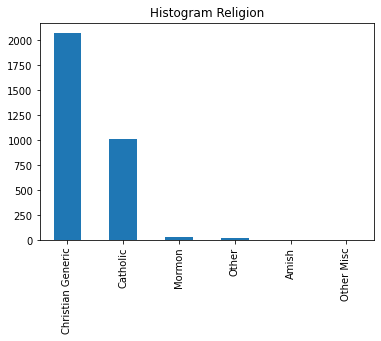

In [ ]:
#histogram for Religion
data['Religion'].value_counts().plot(kind='bar', title='Histogram Religion')

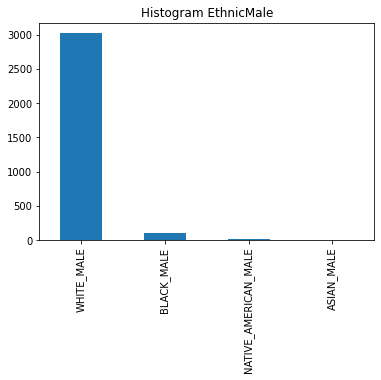

In [ ]:
#histogram for EthnicMale
data['EthnicMale'].value_counts().plot(kind='bar', title='Histogram EthnicMale')

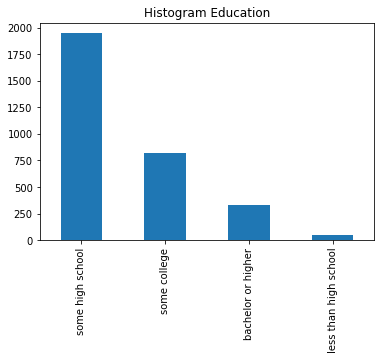

In [ ]:
#histogram for Education
data['Education'].value_counts().plot(kind='bar', title='Histogram Education')

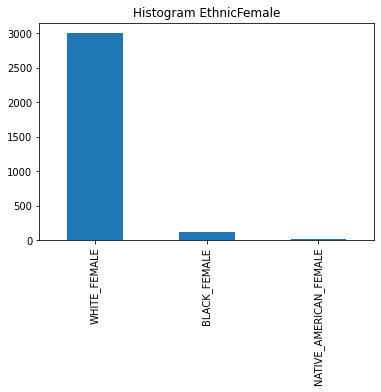

In [ ]:
#histogram for EthnicFemale
data['EthnicFemale'].value_counts().plot(kind='bar', title='Histogram EthnicFemale')

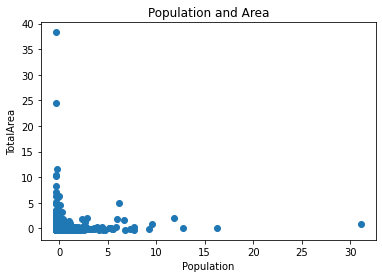

In [ ]:
#2D scatter plot for Area and Population
plt.scatter(x=data['Population'], y=data['TotalArea'])
plt.xlabel('Population')
plt.ylabel('TotalArea')
plt.title('Population and Area')
plt.show()

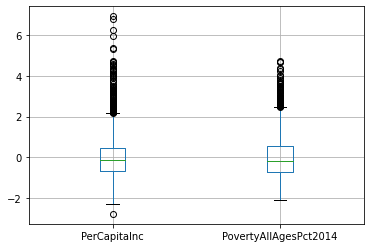

In [34]:
#Box plot
#normalize PovertyAllAgesPct2014
temp_col = data['PovertyAllAgesPct2014']
data['PovertyAllAgesPct2014'] = (data['PovertyAllAgesPct2014'] - data['PovertyAllAgesPct2014'].mean())/data['PovertyAllAgesPct2014'].std()

bp = data.boxplot(column = ['PerCapitaInc','PovertyAllAgesPct2014'])
data['PovertyAllAgesPct2014'] = temp_col

## Conflict

There are contradicting samples in the dataset and they are nonsensical.
In the state that is code 2,
the features votes, Young, Adult, old , TOT_MALE_rate, TOT_FEMALE_rate, EthnicMale, and EthnicFemale share the same result across all counties. Here is what they look like: 

In [32]:
temp_output = data[['State', 'County','votes','Young','Adult','Old','TOT_MALE_rate','TOT_FEMALE_rate','EthnicMale','EthnicFemale']]

temp_output.iloc[0:33]

,State,County,votes,Young,Adult,Old,TOT_MALE_rate,TOT_FEMALE_rate,EthnicMale,EthnicFemale
0,2,13,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
1,2,16,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
2,2,20,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
3,2,50,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
4,2,60,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
5,2,68,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
6,2,70,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
7,2,90,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
8,2,100,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
9,2,105,7471,0.25037,0.584595,0.096915,0.4831,0.498326,WHITE_MALE,WHITE_FEMALE
